In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

In [ ]:
# 安装拓展包
pip install some_package --user

In [ ]:
# 举例：安装sklearn某依赖库
!pip install sklearn2pmml --user

In [ ]:
# 举例：绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#高清显示图片
%matplotlib inline
%config InlineBackend.figure_format="retina"
#保证可以显示中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#正常显示负号
plt.rcParams['axes.unicode_minus']=False

In [3]:
car_price=pd.read_csv('D://car_price.csv')
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#查看数据类型和非空、重复值
car_price.info()
car_price.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

0

In [5]:
# 提取类别变量的列名
cate_columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']

#打印类别变量每个分类的取值情况
for i in cate_columns:
    print(i)
    print(set(car_price[i]))

symboling
{0, 1, 2, 3, -2, -1}
fueltype
{'gas', 'diesel'}
aspiration
{'std', 'turbo'}
doornumber
{'four', 'two'}
carbody
{'hardtop', 'hatchback', 'wagon', 'convertible', 'sedan'}
drivewheel
{'rwd', '4wd', 'fwd'}
enginelocation
{'rear', 'front'}
enginetype
{'ohc', 'ohcf', 'l', 'dohc', 'rotor', 'ohcv', 'dohcv'}
fuelsystem
{'mpfi', 'spdi', 'mfi', 'spfi', '2bbl', '1bbl', '4bbl', 'idi'}
cylindernumber
{'eight', 'six', 'two', 'three', 'four', 'twelve', 'five'}


In [6]:
#气缸数可使用具体的数值替换分类
car_price['cylindernumber']=car_price.cylindernumber.replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [7]:
#提取变量特征数据(除了'car_ID'和'CarName')
car_df=car_price.drop(['car_ID','CarName'],axis=1)

#查看连续数值型情况，并是检查否有异常值
#对数据进行描述性统计
car_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


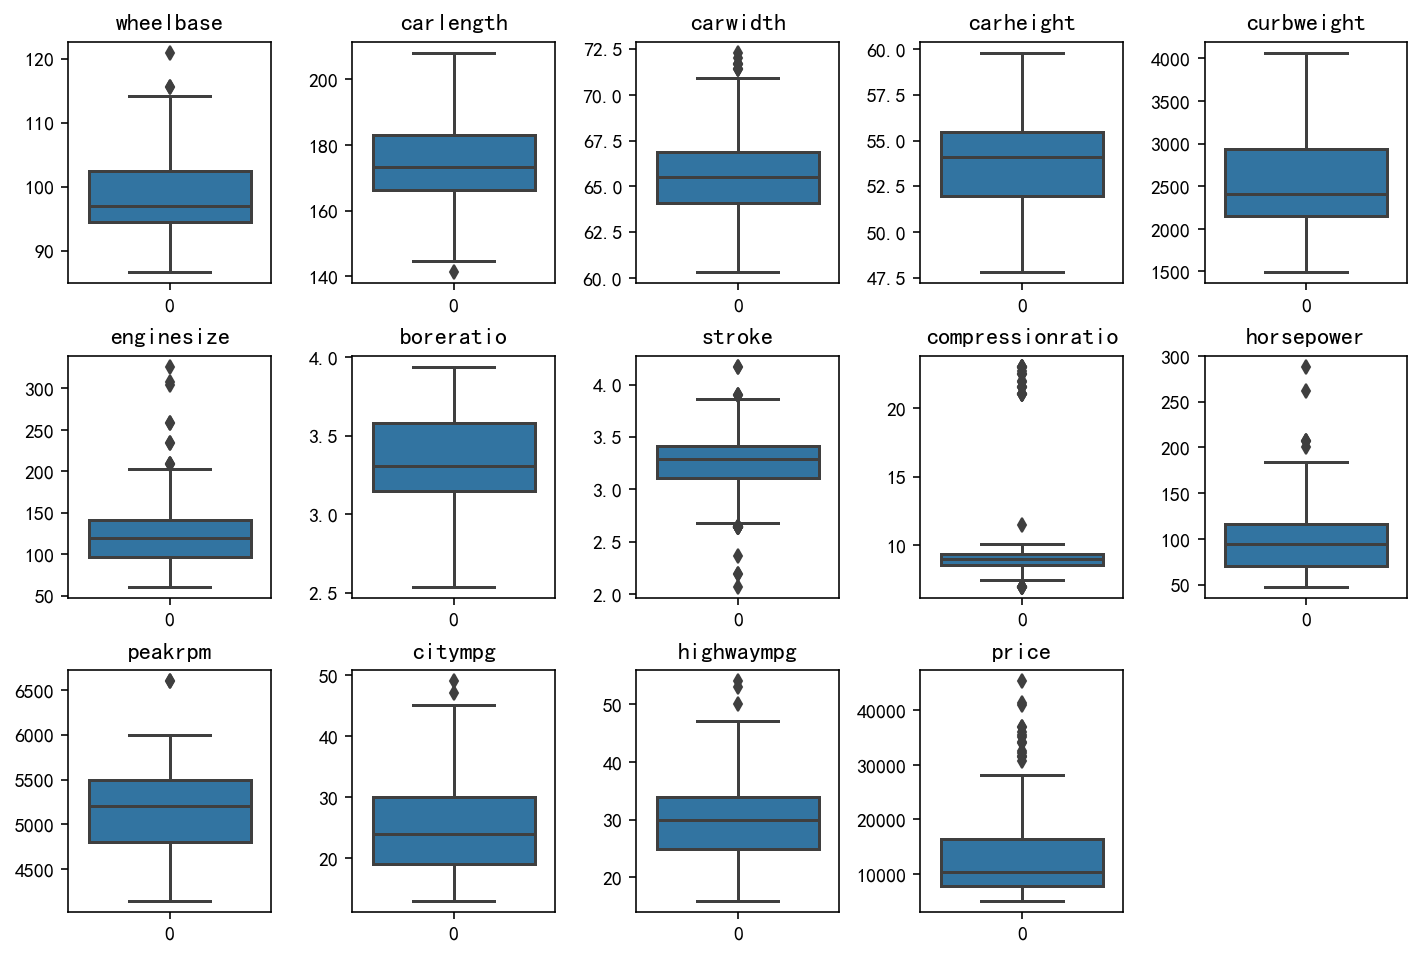

In [8]:
#提取连续数值型数据的列名
num_cols=car_df.columns.drop(cate_columns)
print(num_cols)

#绘制连续数值型数据的箱线图，检查异常值
import seaborn as sns

fig=plt.figure(figsize=(12,8))
i=1
for col in num_cols:
    ax=fig.add_subplot(3,5,i)
    sns.boxplot(data=car_df[col],ax=ax)
    i=i+1
    plt.title(col) 

plt.subplots_adjust(wspace=0.4,hspace=0.3)
plt.show()

In [9]:
#去重查看CarName
print(car_price['CarName'].drop_duplicates())#验证是否object全部改为数值类型

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
196                 volvo 244dl
197                   volvo 245
198                 volvo 264gl
199                volvo diesel
203                   volvo 246
Name: CarName, Length: 147, dtype: object


In [10]:
#利用split，由CarName拆出品牌信息
carBrand=car_price['CarName'].str.split(expand=True)[0]
#查看汽车品牌名称（过滤重复）
print(set(carBrand))

{'mazda', 'saab', 'bmw', 'vw', 'audi', 'renault', 'alfa-romero', 'chevrolet', 'porsche', 'buick', 'plymouth', 'subaru', 'Nissan', 'honda', 'dodge', 'jaguar', 'toyouta', 'vokswagen', 'volvo', 'mercury', 'mitsubishi', 'peugeot', 'volkswagen', 'nissan', 'toyota', 'maxda', 'isuzu', 'porcshce'}


In [11]:
#修改品牌名称的不规则命名
carBrand=carBrand.replace({'porcshce':'porsche','vokswagen':'volkswagen','Nissan':'nissan','maxda':'mazda','vw':'volkswagen','toyouta':'toyota'})
print(set(carBrand))

#将carBrand放入原数据集中
car_price['carBrand']=carBrand

{'mazda', 'saab', 'bmw', 'audi', 'renault', 'alfa-romero', 'chevrolet', 'porsche', 'buick', 'plymouth', 'subaru', 'honda', 'dodge', 'jaguar', 'volvo', 'mercury', 'mitsubishi', 'peugeot', 'volkswagen', 'nissan', 'toyota', 'isuzu'}


In [12]:
# 由上面描述性统计可知，车身长范围为141.1~208.1英寸之间，可划分为6类
bins=[min(car_df.carlength)-0.01,145.67,169.29,181.10,192.91,200.79,max(car_df.carlength)+0.01]
label=['A00','A0','A','B','C','D']
carSize=pd.cut(car_df.carlength,bins,labels=label)
print(carSize)

#将车型大小分类放入数据集中
car_price['carSize']=carSize
car_df['carSize']=carSize

0      A0
1      A0
2       A
3       A
4       A
       ..
200     B
201     B
202     B
203     B
204     B
Name: carlength, Length: 205, dtype: category
Categories (6, object): [A00 < A0 < A < B < C < D]


In [13]:
#计算数值型特征的相关系数
df_corr=car_df.corr()

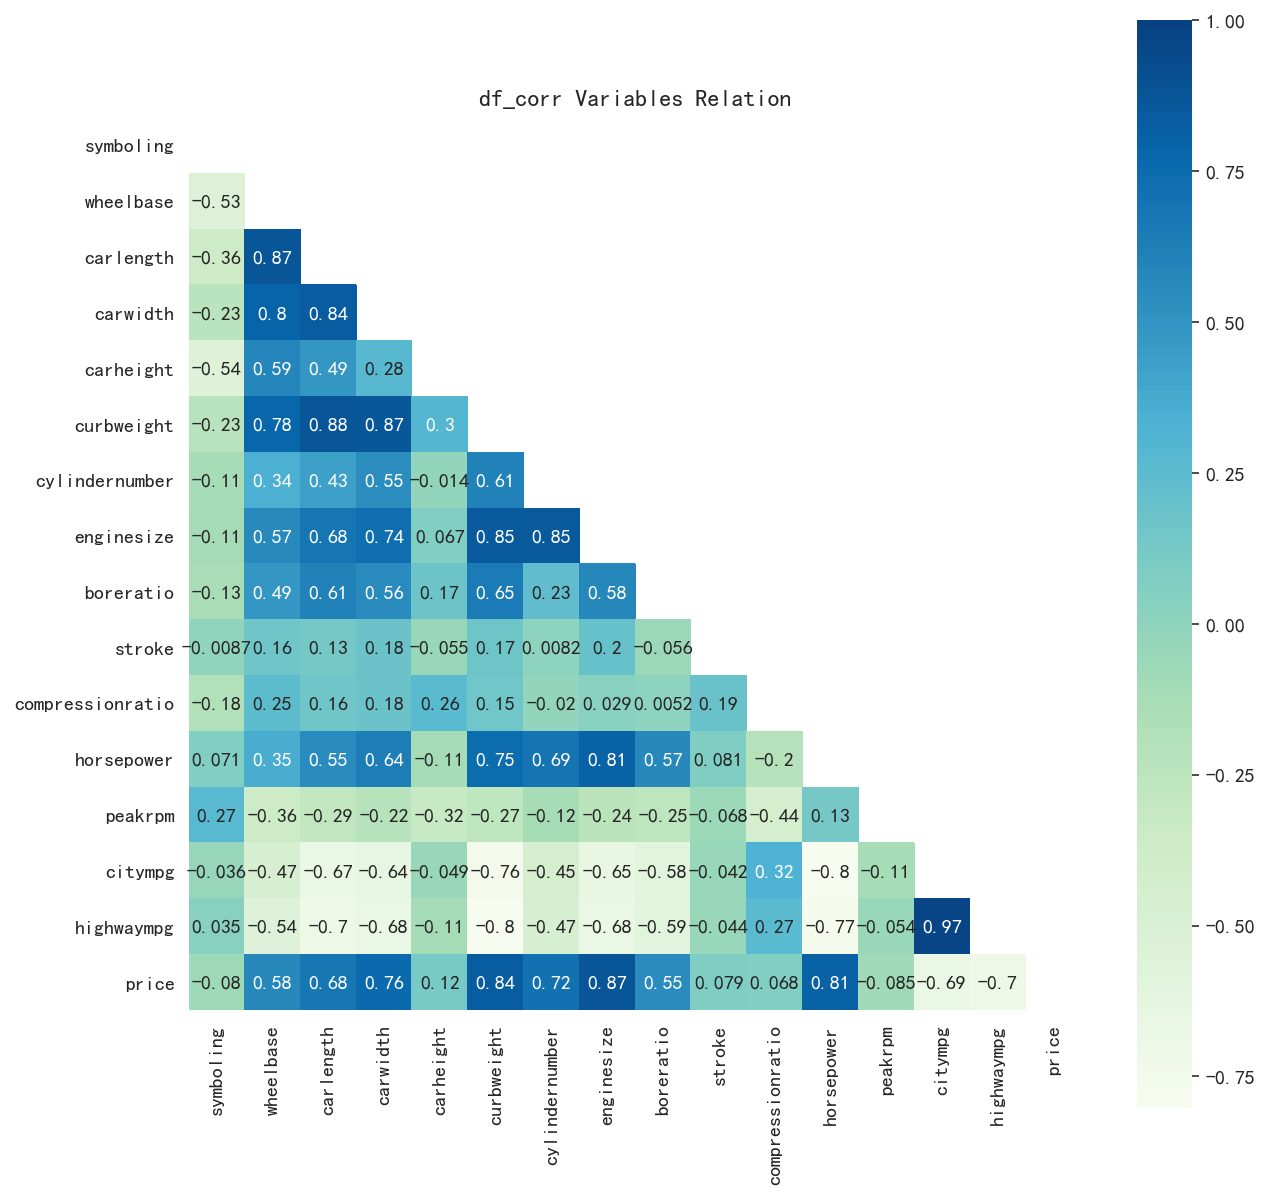

In [55]:
#绘制相关性热力图
mask=np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax=sns.heatmap(df_corr,mask=mask,square=True,annot=True,cmap='GnBu')
ax.set_title("df_corr Variables Relation")
plt.show()

In [15]:
#剔除carlength
features=car_df.drop(['carlength'],axis=1)

In [16]:
# 将取值具有大小意义的类别型变量数据转变为数值型映射
features1=features.copy()

#使用LabelEncoder对不具实体数值数据编码
from sklearn.preprocessing import LabelEncoder
carSize1=LabelEncoder().fit_transform(features1['carSize'])
features1['carSize']=carSize1

In [17]:
#对于类别离散型特征，取值间没有大小意义的，可采用one-hot编码
cate=features1.select_dtypes(include='object').columns
print(cate)

features1=features1.join(pd.get_dummies(features1[cate])).drop(cate,axis=1)
features1.head()

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')


,symboling,wheelbase,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,64.1,48.8,2548,4,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,65.5,52.4,2823,6,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,66.2,54.3,2337,4,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,66.4,54.3,2824,5,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
#对数值型数据进行归一化
from sklearn import preprocessing

features1=preprocessing.MinMaxScaler().fit_transform(features1)
features1=pd.DataFrame(features1)
features1.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.058309,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.316667,0.083333,0.411171,0.2,0.260377,0.664286,0.290476,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.433333,0.383333,0.517843,0.4,0.343396,0.100000,0.666667,0.1250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.491667,0.541667,0.329325,0.2,0.181132,0.464286,0.633333,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.508333,0.541667,0.518231,0.3,0.283019,0.464286,0.633333,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
#对数据集进行PCA降维（信息保留为99.99%）
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9999)
features2=pca.fit_transform(features1)

#降维后，每个主要成分的解释方差占比（解释PC携带的信息多少）
ratio=pca.explained_variance_ratio_
print('各主成分的解释方差占比：',ratio)

#降维后有几个成分
print('降维后有几个成分：',len(ratio))

#累计解释方差占比
cum_ratio=np.cumsum(ratio)
print('累计解释方差占比：',cum_ratio)

各主成分的解释方差占比： [2.39780781e-01 2.00631256e-01 1.19647716e-01 6.96158725e-02
 6.26813731e-02 4.62476101e-02 4.18234241e-02 3.29587027e-02
 2.56724995e-02 2.20879580e-02 1.96367534e-02 1.62909630e-02
 1.46554010e-02 1.37454104e-02 1.07092251e-02 9.71883628e-03
 8.63702444e-03 7.92104086e-03 6.68243901e-03 5.57160062e-03
 4.42099290e-03 3.83735876e-03 3.15124051e-03 2.71801338e-03
 2.28419651e-03 1.78287025e-03 1.47721184e-03 1.15039081e-03
 1.10987714e-03 9.48527208e-04 6.71068839e-04 4.98987159e-04
 4.35515101e-04 3.22617234e-04 1.86844410e-04 1.16073554e-04
 1.07112858e-04]
降维后有几个成分： 37
累计解释方差占比： [0.23978078 0.44041204 0.56005975 0.62967563 0.692357   0.73860461
 0.78042803 0.81338674 0.83905924 0.86114719 0.88078395 0.89707491
 0.91173031 0.92547572 0.93618495 0.94590378 0.95454081 0.96246185
 0.96914429 0.97471589 0.97913688 0.98297424 0.98612548 0.98884349
 0.99112769 0.99291056 0.99438777 0.99553816 0.99664804 0.99759657
 0.99826764 0.99876662 0.99920214 0.99952476 0.9997116  0.99982

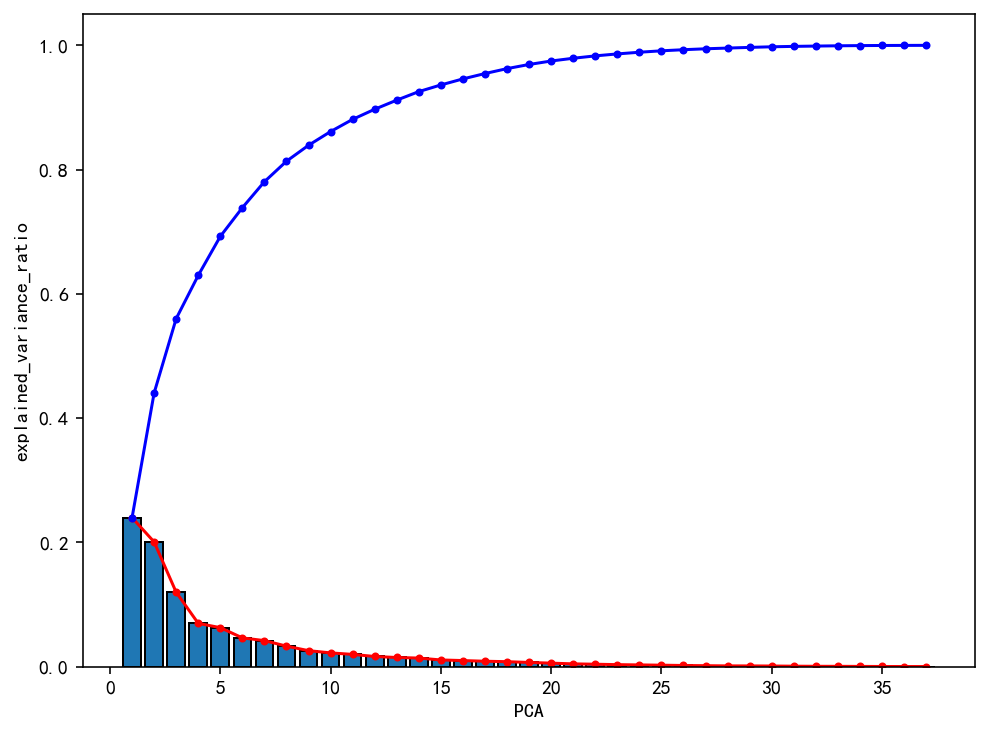

In [20]:
#绘制PCA降维后各成分方差占比的直方图和累计方差占比折线图
plt.figure(figsize=(8,6))
X=range(1,len(ratio)+1)
Y=ratio
plt.bar(X,Y,edgecolor='black')
plt.plot(X,Y,'r.-')
plt.plot(X,cum_ratio,'b.-')
plt.ylabel('explained_variance_ratio')
plt.xlabel('PCA')
plt.show()

In [21]:
#PCA选择降维保留8个主要成分
pca=PCA(n_components=8) 
features3=pca.fit_transform(features1)

#降维后的累计各成分方差占比和（即解释PC携带的信息多少）
print(sum(pca.explained_variance_ratio_))

0.8133867361927234


In [22]:
#Birch聚类
from sklearn.cluster import Birch
X = features3
brc = Birch(n_clusters=None)
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=0.5)

In [23]:
brc = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.5)
brc.fit(X)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=0.5)

In [24]:
lab=brc.predict(X)
print(lab)

[ 0  0  0 30 30  1 30 31 32  2  3  4  3  4  4  4  3 52  5  6 33  6  6  2
 34 33 33 35 36 37  6  6  6  6  6 33 31  6  6 33 33 30  7 38  7 33  8  9
  9 10  6  6  6 33 33  8  8  8  0  6 33  6 33 39 34  4 40 41 42 43 41  9
 11  9 11 12  6  6  6 37 37  6 37 37 37 33 33 44 33  7 45  7 33 36  7  6
 33 36  7 34 33 13 14 13  0 15  0  9 47 16 46  9 47 16 46  9 47 17  6 37
 34 33 33 36 12 18 19 19 19  0 31 20 20 30 20 30 21 48  5  5  5 22 22 13
 22 23 24 14 24 25  6  6 34 36 36 36 33 34 39 49 33 34 33 26 27 10  0 28
 28 18 28 18 28 30 50 51 30 51  0  0  9 16 45  1 39 30 30 50 30  1 20 30
 50 31 52 29 52 29 53 54 52 53  9 41 53]


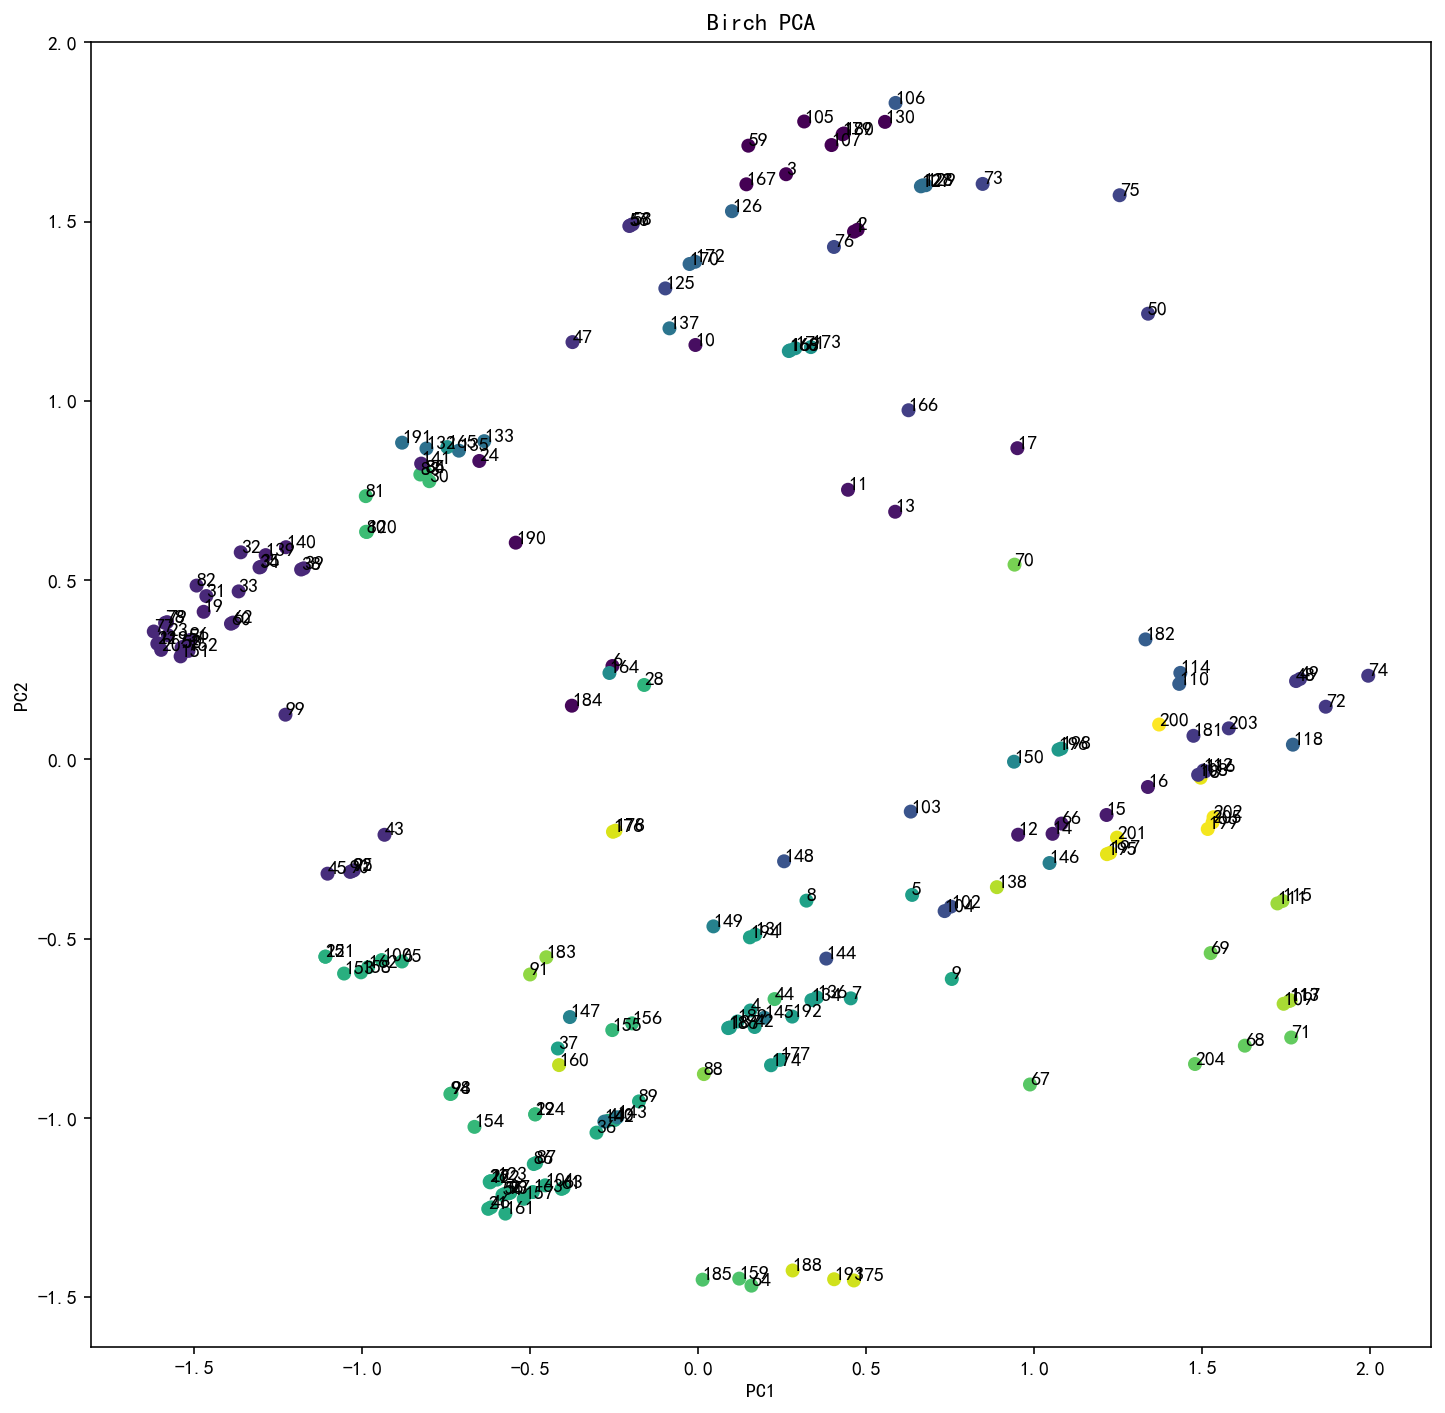

In [25]:
plt.figure(figsize=(12,12))
plt.scatter(features3[:,0],features3[:,1],c=lab)
for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_price.car_ID[ii])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Birch PCA')
plt.show()

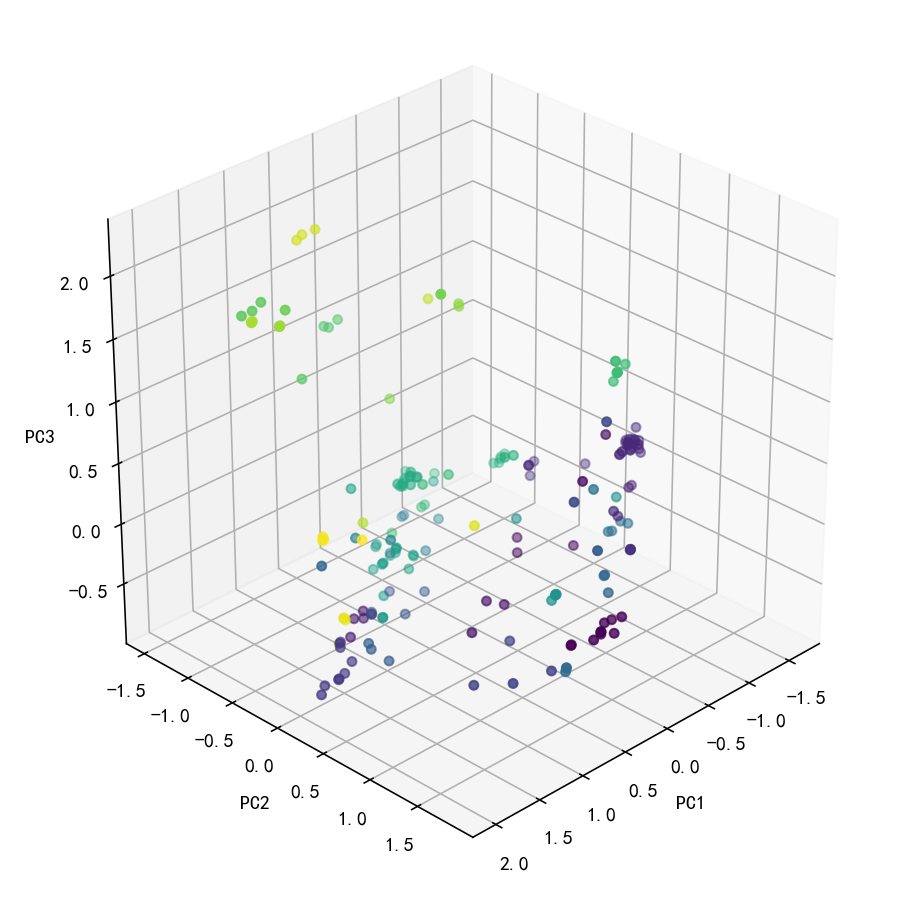

In [26]:
#绘制聚类结果后3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(features3[:,0],features3[:,1],features3[:,2],c=lab)
#视角转换，转换后更易看出簇群
ax.view_init(30,45) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

n_cluster= 2 The average silhouette_score is : 0.576566038945704
n_cluster= 3 The average silhouette_score is : 0.576566038945704
n_cluster= 4 The average silhouette_score is : 0.576566038945704
n_cluster= 5 The average silhouette_score is : 0.576566038945704
n_cluster= 6 The average silhouette_score is : 0.576566038945704
n_cluster= 7 The average silhouette_score is : 0.576566038945704
n_cluster= 8 The average silhouette_score is : 0.576566038945704


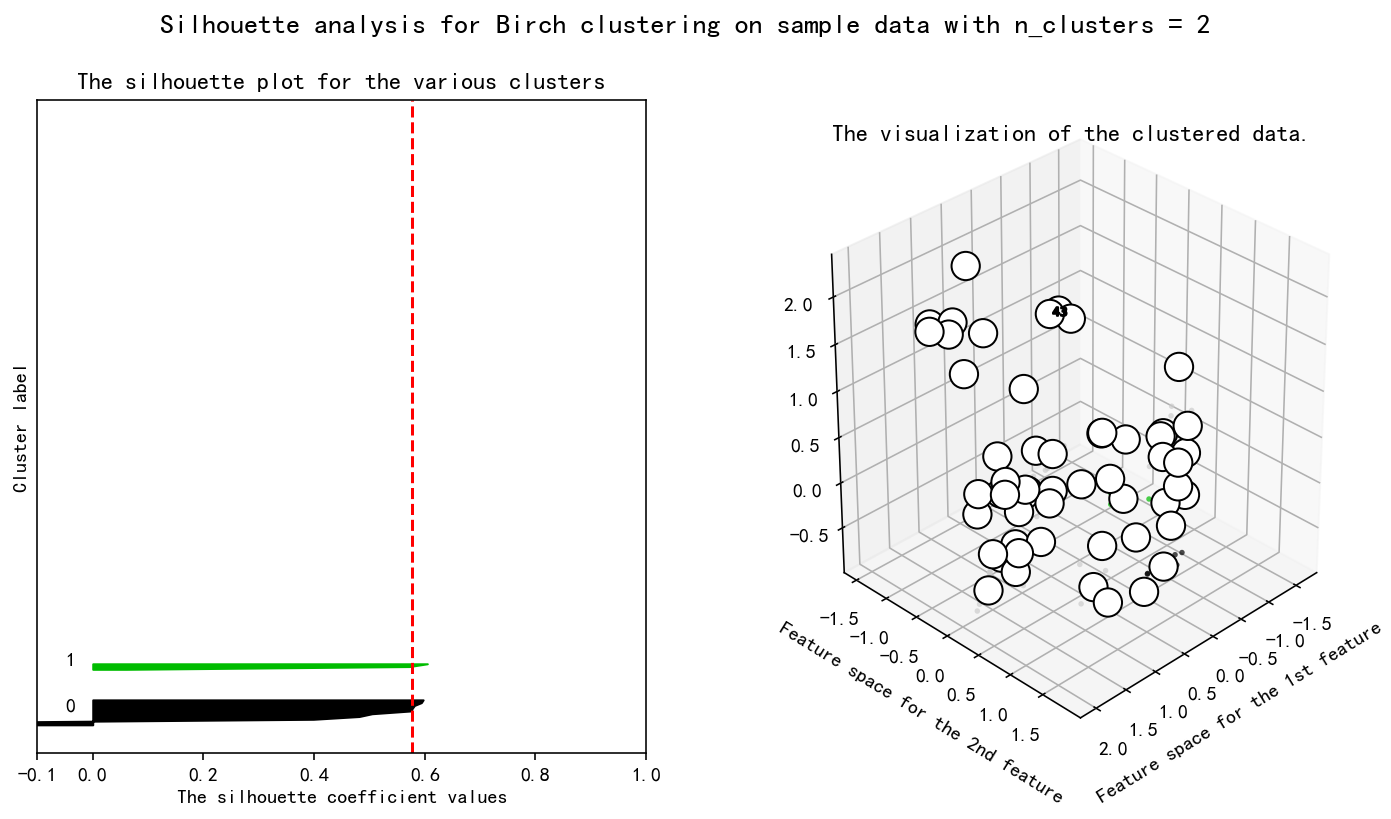

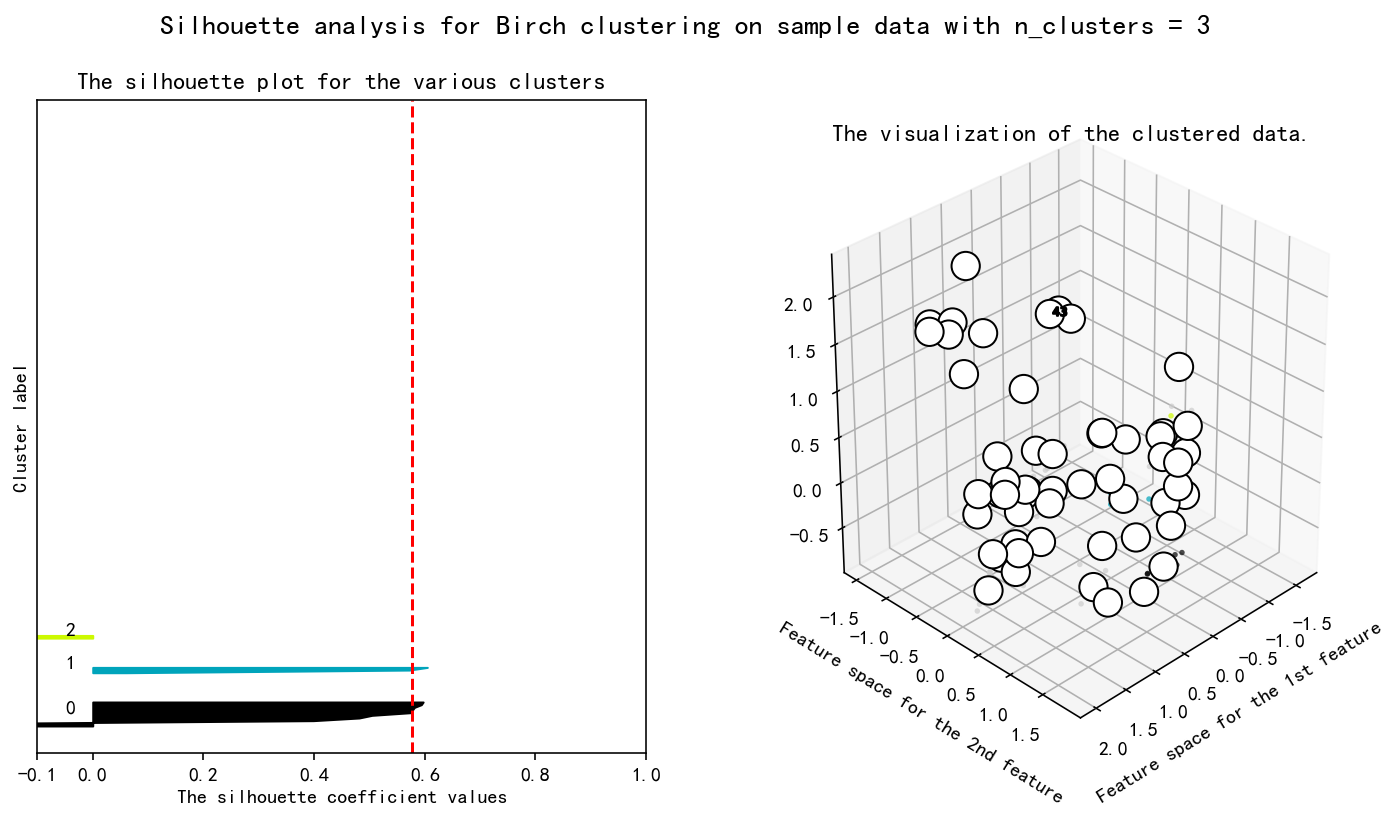

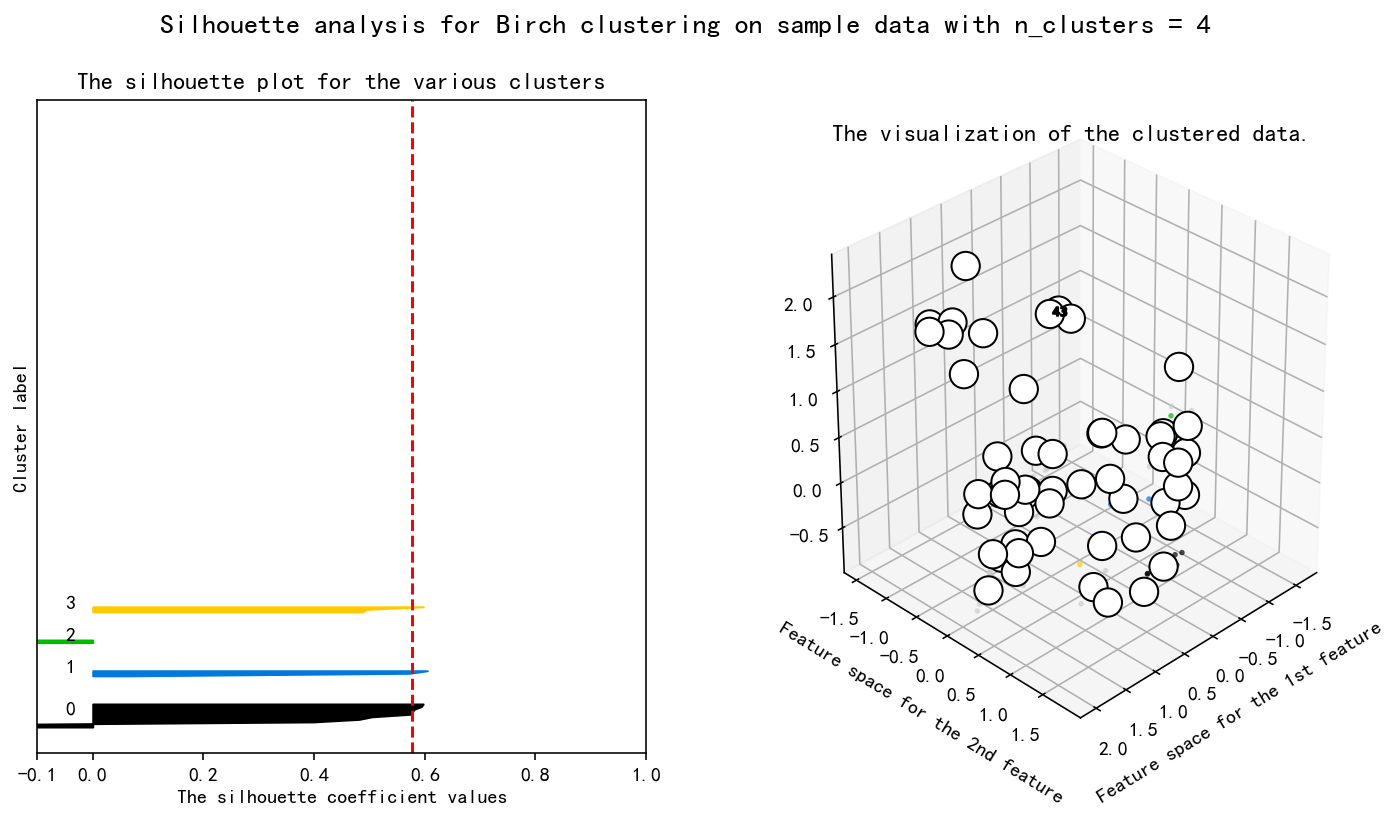

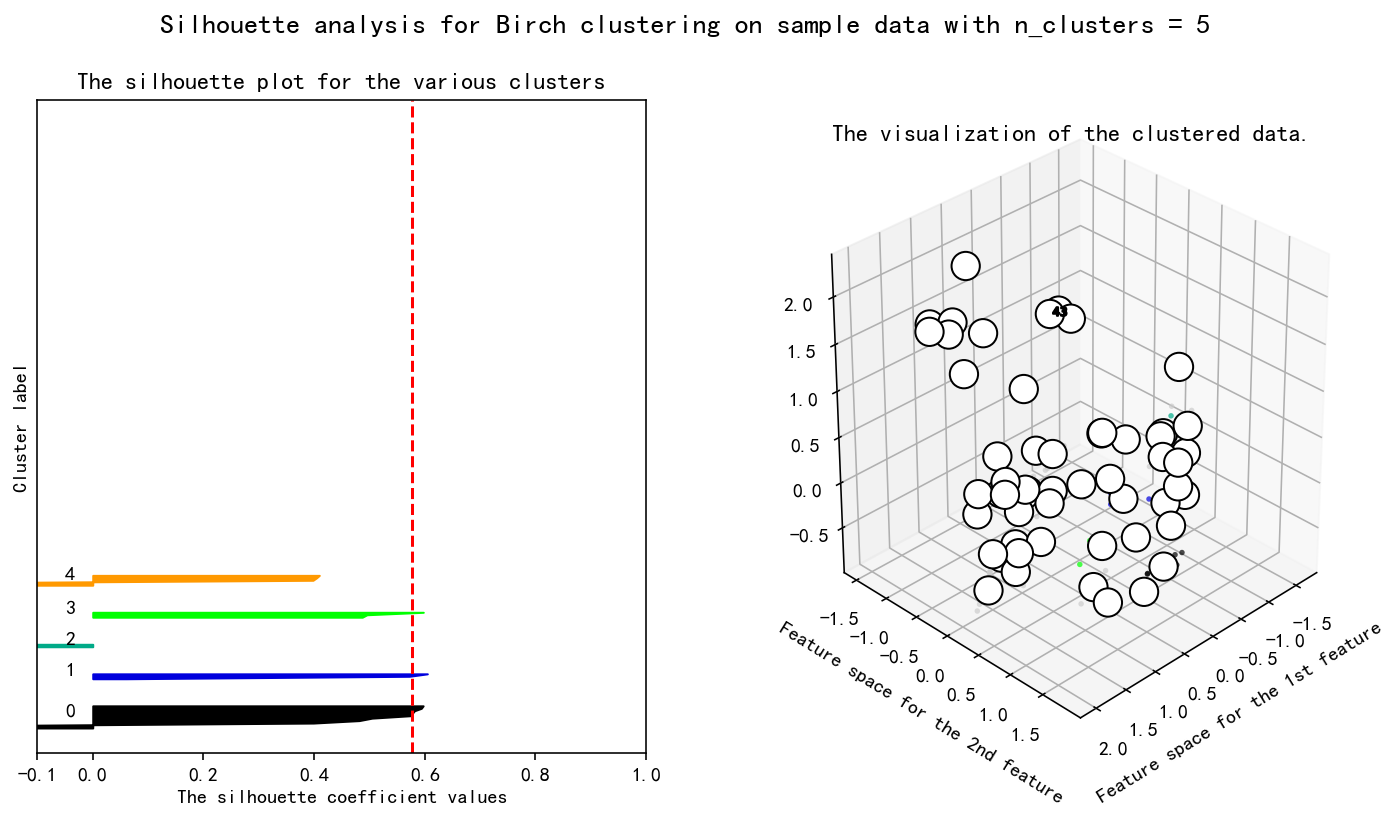

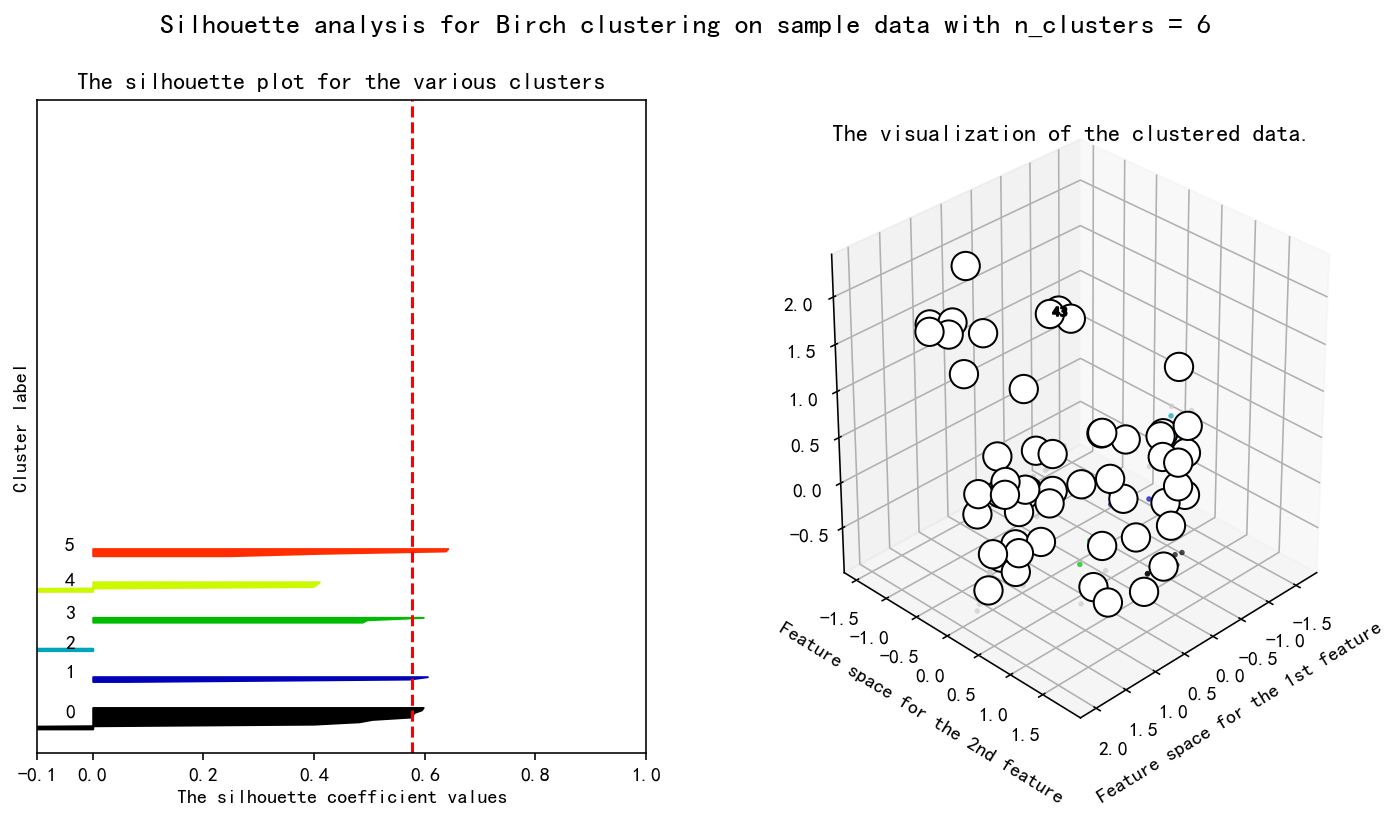

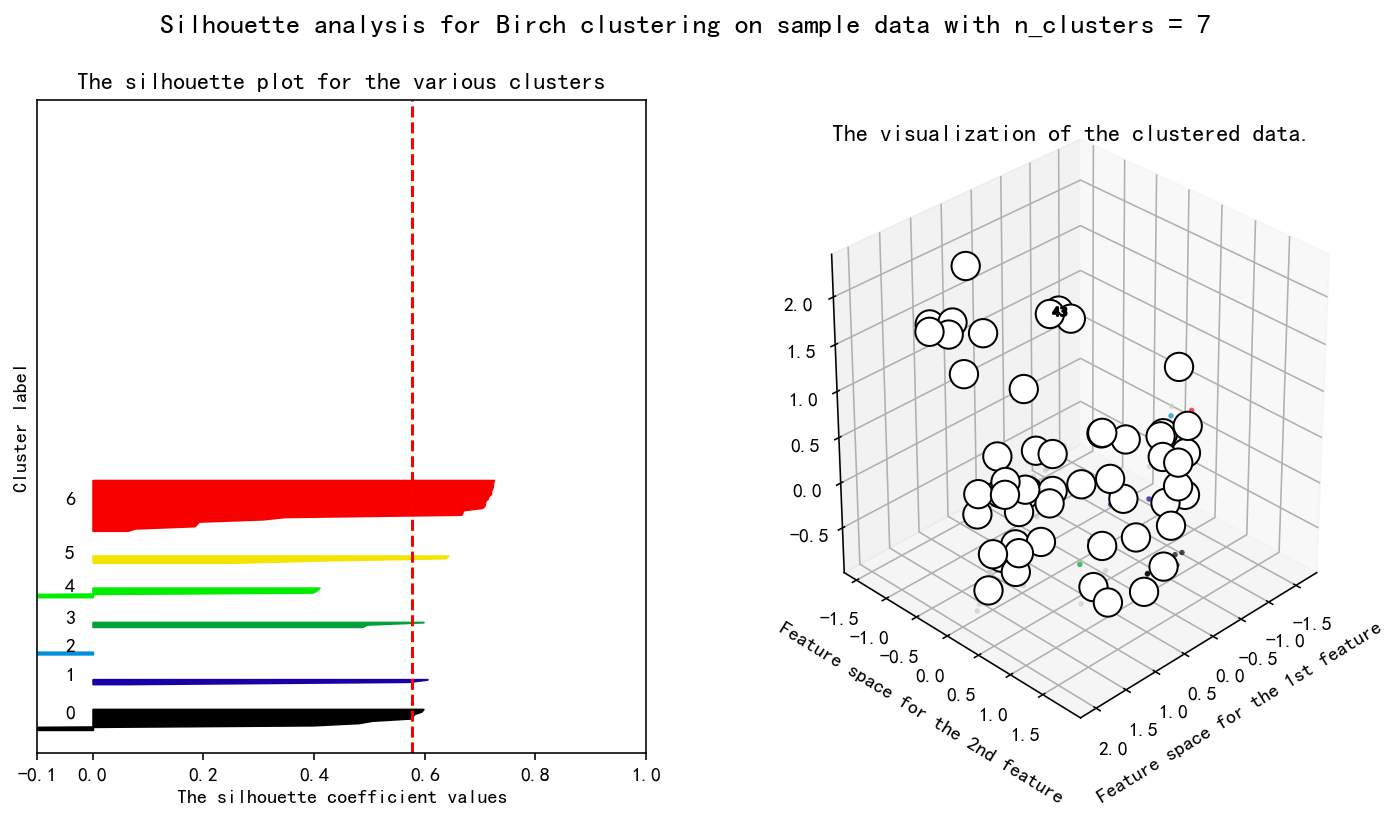

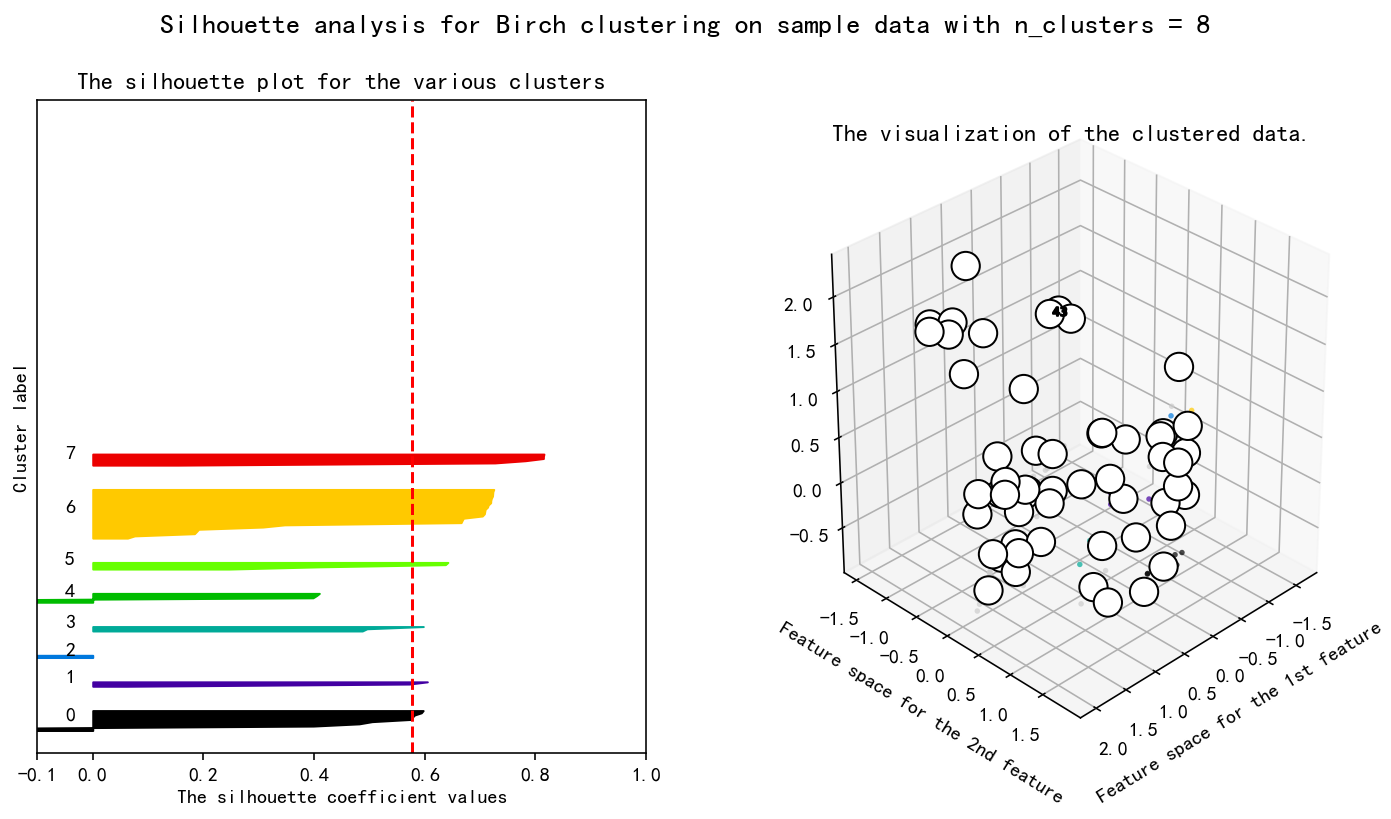

In [27]:
#绘制轮廓图和3d散点图
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

for n_clusters in range(2,9):
    fig=plt.figure(figsize=(12,6))
    ax1=fig.add_subplot(121)
    ax2=fig.add_subplot(122,projection='3d')
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(features3)+(n_clusters+1)*10])
    brc=Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.5)
    y_brc=brc.fit_predict(features3)
    silhouette_avg=silhouette_score(features3,y_brc)
    print('n_cluster=',n_clusters,'The average silhouette_score is :',silhouette_avg)

    cluster_labels=np.unique(y_brc)   
    silhouette_vals=silhouette_samples(features3,y_brc,metric='euclidean')
    y_ax_lower=10
    for i in range(n_clusters):
        c_silhouette_vals=silhouette_vals[y_brc==i]
        c_silhouette_vals.sort()
        cluster_i=c_silhouette_vals.shape[0]
        y_ax_upper=y_ax_lower+cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(range(y_ax_lower,y_ax_upper),0,c_silhouette_vals,edgecolor='none',color=color)
        ax1.text(-0.05,y_ax_lower+0.5*cluster_i,str(i))
        y_ax_lower=y_ax_upper+10
    
    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')

    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1.0])

    colors=cm.nipy_spectral(y_brc.astype(float)/n_clusters)
    ax2.scatter(features3[:,0],features3[:,1],features3[:,2],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')

    centers=brc.subcluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],centers[:,2],marker='o',c='white',alpha=1,s=200,edgecolor='k')

    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1],c[2],marker='$%d$' % i,alpha=1,s=50,edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.view_init(30,45)

    plt.suptitle(("Silhouette analysis for Birch clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

In [28]:
#调整选择n_cluster=6进行聚类
brc=Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=6,
   threshold=0.5)
y_pred=brc.fit_predict(features3)
print(y_pred)

#将聚类后的类目放入原特征数据中
car_df_brc=car_price.copy()
car_df_brc['brc_result']=y_pred

[2 2 2 1 1 2 1 1 0 0 2 4 2 4 4 4 2 4 2 2 1 2 2 0 1 1 1 0 1 0 2 2 2 2 2 1 1
 2 2 1 1 1 2 2 2 1 2 4 4 2 2 2 2 1 1 2 2 2 2 2 1 2 1 5 1 4 3 3 3 3 3 4 2 4
 2 0 2 2 2 0 0 2 0 0 0 1 1 0 1 2 5 2 1 1 2 2 1 1 2 1 1 1 1 1 2 0 2 4 3 4 3
 4 3 4 3 4 3 4 2 0 1 1 1 1 0 2 2 2 2 2 1 2 2 1 2 1 0 0 2 2 2 1 1 1 1 0 1 1
 1 0 2 2 1 1 1 1 1 1 5 5 1 1 1 2 2 2 2 2 2 2 2 2 2 1 5 1 1 1 2 2 4 4 5 2 5
 1 1 5 1 2 2 1 5 1 4 4 4 4 4 4 4 4 4 3 4]


In [29]:
#统计聚类后每个集群的车型数
car_df_brc.groupby('brc_result')['car_ID'].count()

brc_result
0    19
1    64
2    74
3    11
4    28
5     9
Name: car_ID, dtype: int64

In [30]:
#统计每个集群各个品牌的车型数
car_df_brc.groupby(by=['brc_result','carBrand'])['car_ID'].count()

brc_result  carBrand   
0           audi            2
            dodge           3
            mercury         1
            mitsubishi      6
            nissan          1
            plymouth        2
            saab            2
            subaru          2
1           audi            4
            chevrolet       1
            dodge           4
            honda           5
            isuzu           1
            mazda           5
            mitsubishi      3
            nissan          9
            plymouth        4
            renault         1
            saab            2
            subaru          7
            toyota         13
            volkswagen      5
2           alfa-romero     3
            audi            1
            bmw             3
            buick           2
            chevrolet       2
            dodge           2
            honda           8
            isuzu           3
            jaguar          1
            mazda           9
            mits

In [31]:
#统计每个品牌所属各个集群的车型数
car_df_brc.groupby(by=['carBrand','brc_result'])['brc_result'].count()

carBrand     brc_result
alfa-romero  2              3
audi         0              2
             1              4
             2              1
bmw          2              3
             4              5
buick        2              2
             3              4
             4              2
chevrolet    1              1
             2              2
dodge        0              3
             1              4
             2              2
honda        1              5
             2              8
isuzu        1              1
             2              3
jaguar       2              1
             4              2
mazda        1              5
             2              9
             3              1
             4              1
             5              1
mercury      0              1
mitsubishi   0              6
             1              3
             2              4
nissan       0              1
             1              9
             2              7
             5  

In [32]:
#查看特指车名‘vokswagen’车型的聚类集群
df=car_df_brc.loc[:,['car_ID','CarName','carBrand','brc_result']]
print(df.loc[df['CarName'].str.contains("vokswagen")])

     car_ID           CarName    carBrand  brc_result
182     183  vokswagen rabbit  volkswagen           5


In [33]:
df.loc[df['brc_result']==5]

,car_ID,CarName,carBrand,brc_result
63,64,mazda glc deluxe,mazda,5
90,91,nissan gt-r,nissan,5
158,159,toyota corona,toyota,5
159,160,toyota corolla,toyota,5
174,175,toyota celica gt,toyota,5
182,183,vokswagen rabbit,volkswagen,5
184,185,volkswagen model 111,volkswagen,5
187,188,volkswagen super beetle,volkswagen,5
192,193,volkswagen rabbit custom,volkswagen,5


In [34]:
#查看大众volkswagen品牌各集群内的竞品车型
df_volk=df.loc[df['brc_result']<6].sort_values(by=['brc_result','carBrand'])
df_volk

,car_ID,CarName,carBrand,brc_result
8,9,audi 4000,audi,0
9,10,audi 5000s (diesel),audi,0
23,24,dodge d200,dodge,0
27,28,dodge coronet custom,dodge,0
29,30,dodge coronet custom (sw),dodge,0
...,...,...,...,...
174,175,toyota celica gt,toyota,5
182,183,vokswagen rabbit,volkswagen,5
184,185,volkswagen model 111,volkswagen,5
187,188,volkswagen super beetle,volkswagen,5


In [35]:
df5=car_df_brc.loc[car_df_brc['brc_result']==5]
df5.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,brc_result
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,3.39,22.7,64,4650,36,42,10795.0,mazda,A,5
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,3.47,21.9,55,4800,45,50,7099.0,nissan,A0,5
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,3.35,22.5,56,4500,34,36,7898.0,toyota,A0,5
159,160,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,...,3.35,22.5,56,4500,38,47,7788.0,toyota,A0,5
174,175,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,...,3.35,22.5,73,4500,30,33,10698.0,toyota,A,5


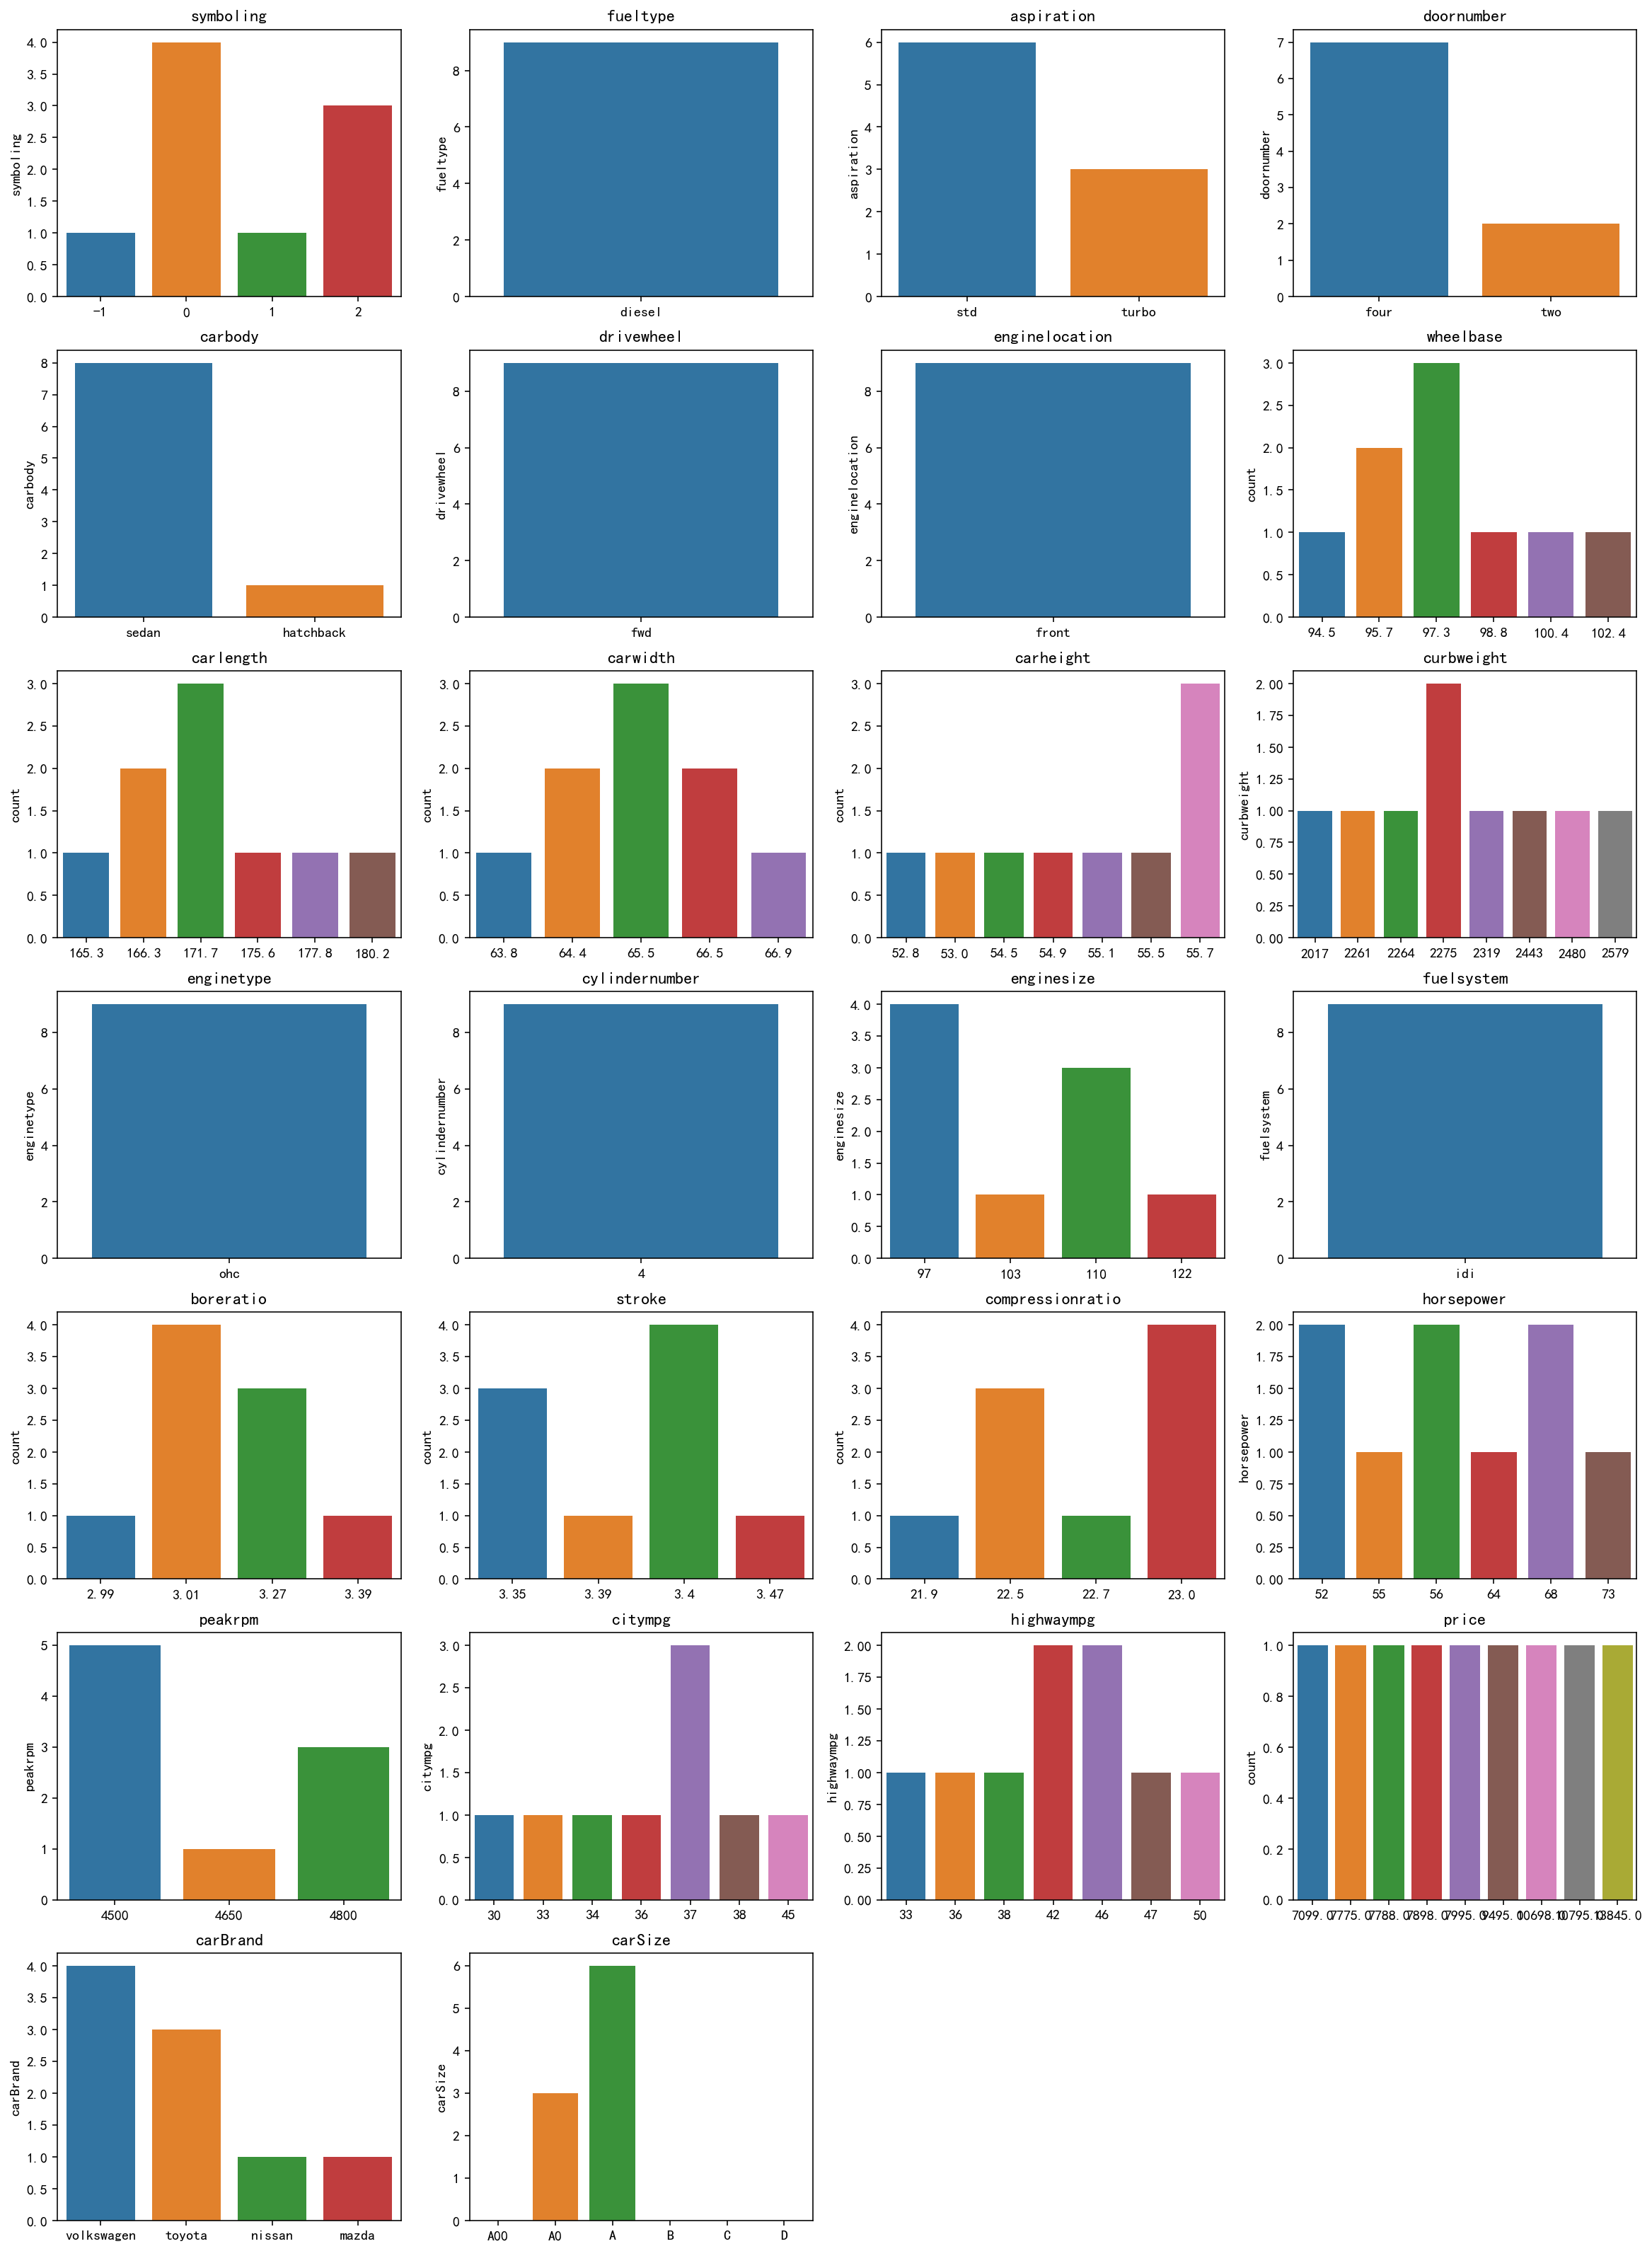

In [36]:
df5_1=df5.drop(['car_ID','CarName','brc_result'],axis=1)
#查看集群5的车型所有特征分布
fig=plt.figure(figsize=(20,20))
i=1
for c in df5_1.columns:
    ax=fig.add_subplot(7,4,i)
    if df5_1[c].dtypes=='int' or df5_1[c].dtypes=='float':
        sns.countplot(df5_1[c],ax=ax)
    else:
        sns.barplot(df5_1[c].value_counts().index,df5_1[c].value_counts(),ax=ax)
    i=i+1
    plt.xlabel('')
    plt.title(c)  
plt.subplots_adjust(top=1.2)
plt.show()

In [37]:
#对不同车型级别、品牌、车身等类型特征进行数据透视
df2=df5.pivot_table(index=['carSize','carbody','carBrand','CarName'])
df2

boreratio  brc_result  \
carSize carbody   carBrand   CarName                                           
A0      hatchback toyota     toyota corolla                 3.27           5   
        sedan     nissan     nissan gt-r                    2.99           5   
                  toyota     toyota corona                  3.27           5   
A       sedan     mazda      mazda glc deluxe               3.39           5   
                  toyota     toyota celica gt               3.27           5   
                  volkswagen vokswagen rabbit               3.01           5   
                             volkswagen model 111           3.01           5   
                             volkswagen rabbit custom       3.01           5   
                             volkswagen super beetle        3.01           5   

                                                       car_ID  carheight  \
carSize carbody   carBrand   CarName                                       
A0      hatchback toyota     toyota corolla               160       52.8   
        sedan     nissan     nissan gt-r                   91       54.5   
                  toyota     toyota corona                159       53.0   
A       sedan     mazda      mazda glc deluxe              64       55.5   
                  toyota     toyota celica gt             175       54.9   
                  volkswagen vokswagen rabbit             183       55.7   
                             volkswagen model 111         185       55.7   
                             volkswagen rabbit custom     193       55.1   
                             volkswagen super beetle      188       55.7   

                                                       carlength  carwidth  \
carSize carbody   carBrand   CarName                                         
A0      hatchback toyota     toyota corolla                166.3      64.4   
        sedan     nissan     nissan gt-r                   165.3      63.8   
                  toyota     toyota corona                 166.3      64.4   
A       sedan     mazda      mazda glc deluxe              177.8      66.5   
                  toyota     toyota celica gt              175.6      66.5   
                  volkswagen vokswagen rabbit              171.7      65.5   
                             volkswagen model 111          171.7      65.5   
                             volkswagen rabbit custom      180.2      66.9   
                             volkswagen super beetle       171.7      65.5   

                                                       citympg  \
carSize carbody   carBrand   CarName                             
A0      hatchback toyota     toyota corolla                 38   
        sedan     nissan     nissan gt-r                    45   
                  toyota     toyota corona                  34   
A       sedan     mazda      mazda glc deluxe               36   
                  toyota     toyota celica gt               30   
                  volkswagen vokswagen rabbit               37   
                             volkswagen model 111           37   
                             volkswagen rabbit custom       33   
                             volkswagen super beetle        37   

                                                       compressionratio  \
carSize carbody   carBrand   CarName                                      
A0      hatchback toyota     toyota corolla                        22.5   
        sedan     nissan     nissan gt-r                           21.9   
                  toyota     toyota corona                         22.5   
A       sedan     mazda      mazda glc deluxe                      22.7   
                  toyota     toyota celica gt                      22.5   
                  volkswagen vokswagen rabbit                      23.0   
                             volkswagen model 111                  23.0   
                             volkswagen rabbit custom              23.0   
 

In [38]:
#提取集群5中的A级车
df5_A=df5.loc[df5['carSize']=='A']
df5_A

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,brc_result
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,...,3.39,22.7,64,4650,36,42,10795.0,mazda,A,5
174,175,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,...,3.35,22.5,73,4500,30,33,10698.0,toyota,A,5
182,183,2,vokswagen rabbit,diesel,std,two,sedan,fwd,front,97.3,...,3.40,23.0,52,4800,37,46,7775.0,volkswagen,A,5
184,185,2,volkswagen model 111,diesel,std,four,sedan,fwd,front,97.3,...,3.40,23.0,52,4800,37,46,7995.0,volkswagen,A,5
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,...,3.40,23.0,68,4500,37,42,9495.0,volkswagen,A,5
192,193,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,...,3.40,23.0,68,4500,33,38,13845.0,volkswagen,A,5


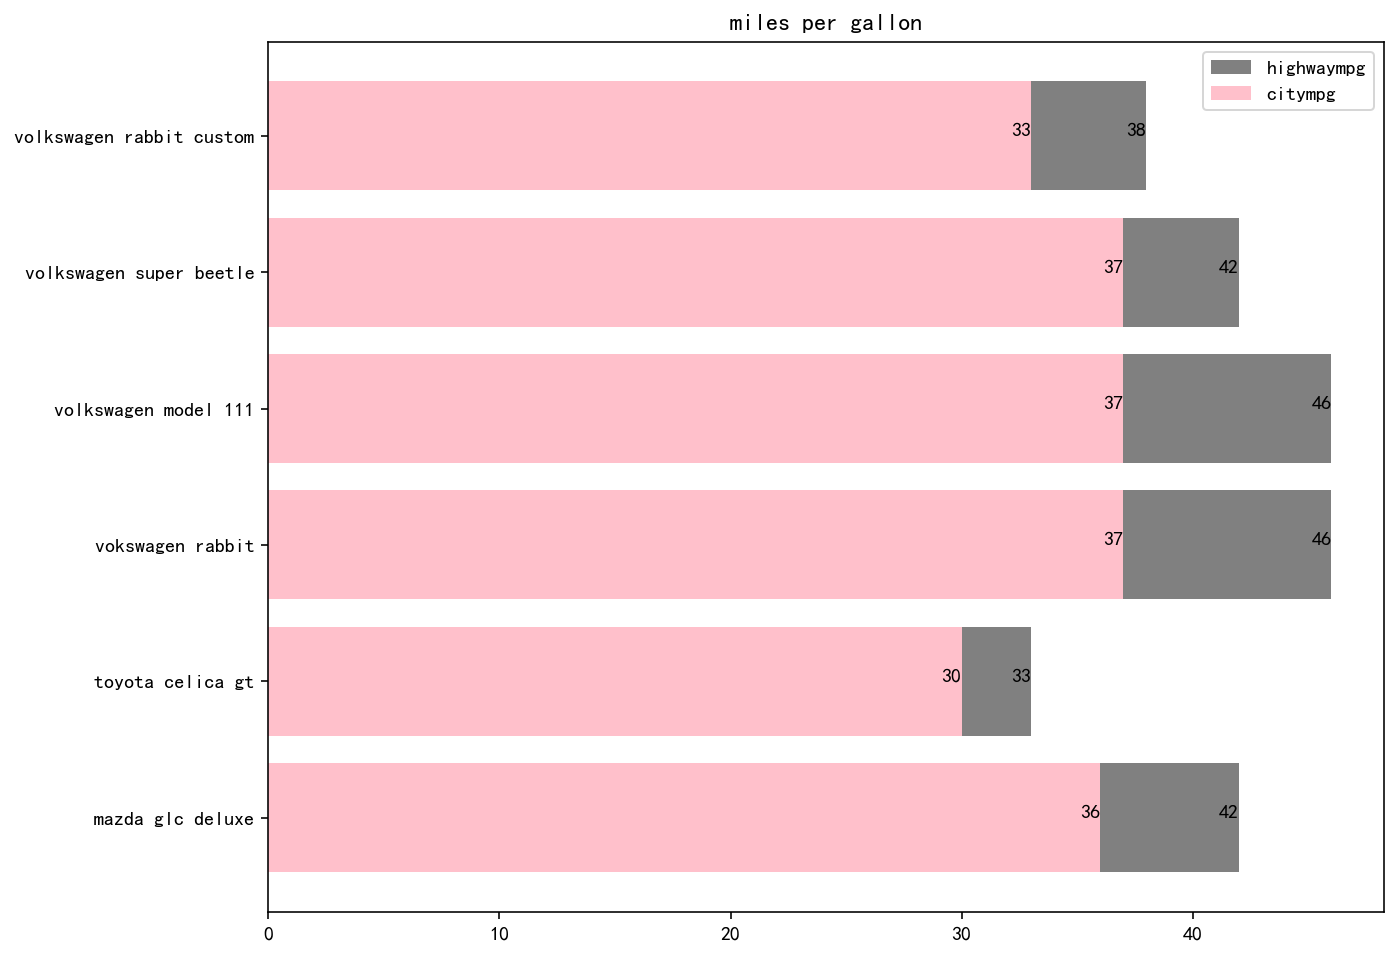

In [52]:
#对油耗的分析('citympg','highwaympg')
lab=df5_A['CarName']

fig,ax=plt.subplots(figsize=(10,8))
ax.barh(range(len(lab)),df5_A['highwaympg'],tick_label=lab,color='grey')
ax.barh(range(len(lab)),df5_A['citympg'],tick_label=lab,color='pink')
for i,(highway,city) in enumerate(zip(df5_A['highwaympg'],df5_A['citympg'])):
    ax.text(highway,i,highway,ha='right')
    ax.text(city,i,city,ha='right')

plt.legend(('highwaympg','citympg'), loc='upper right')
plt.title('miles per gallon')
plt.show()

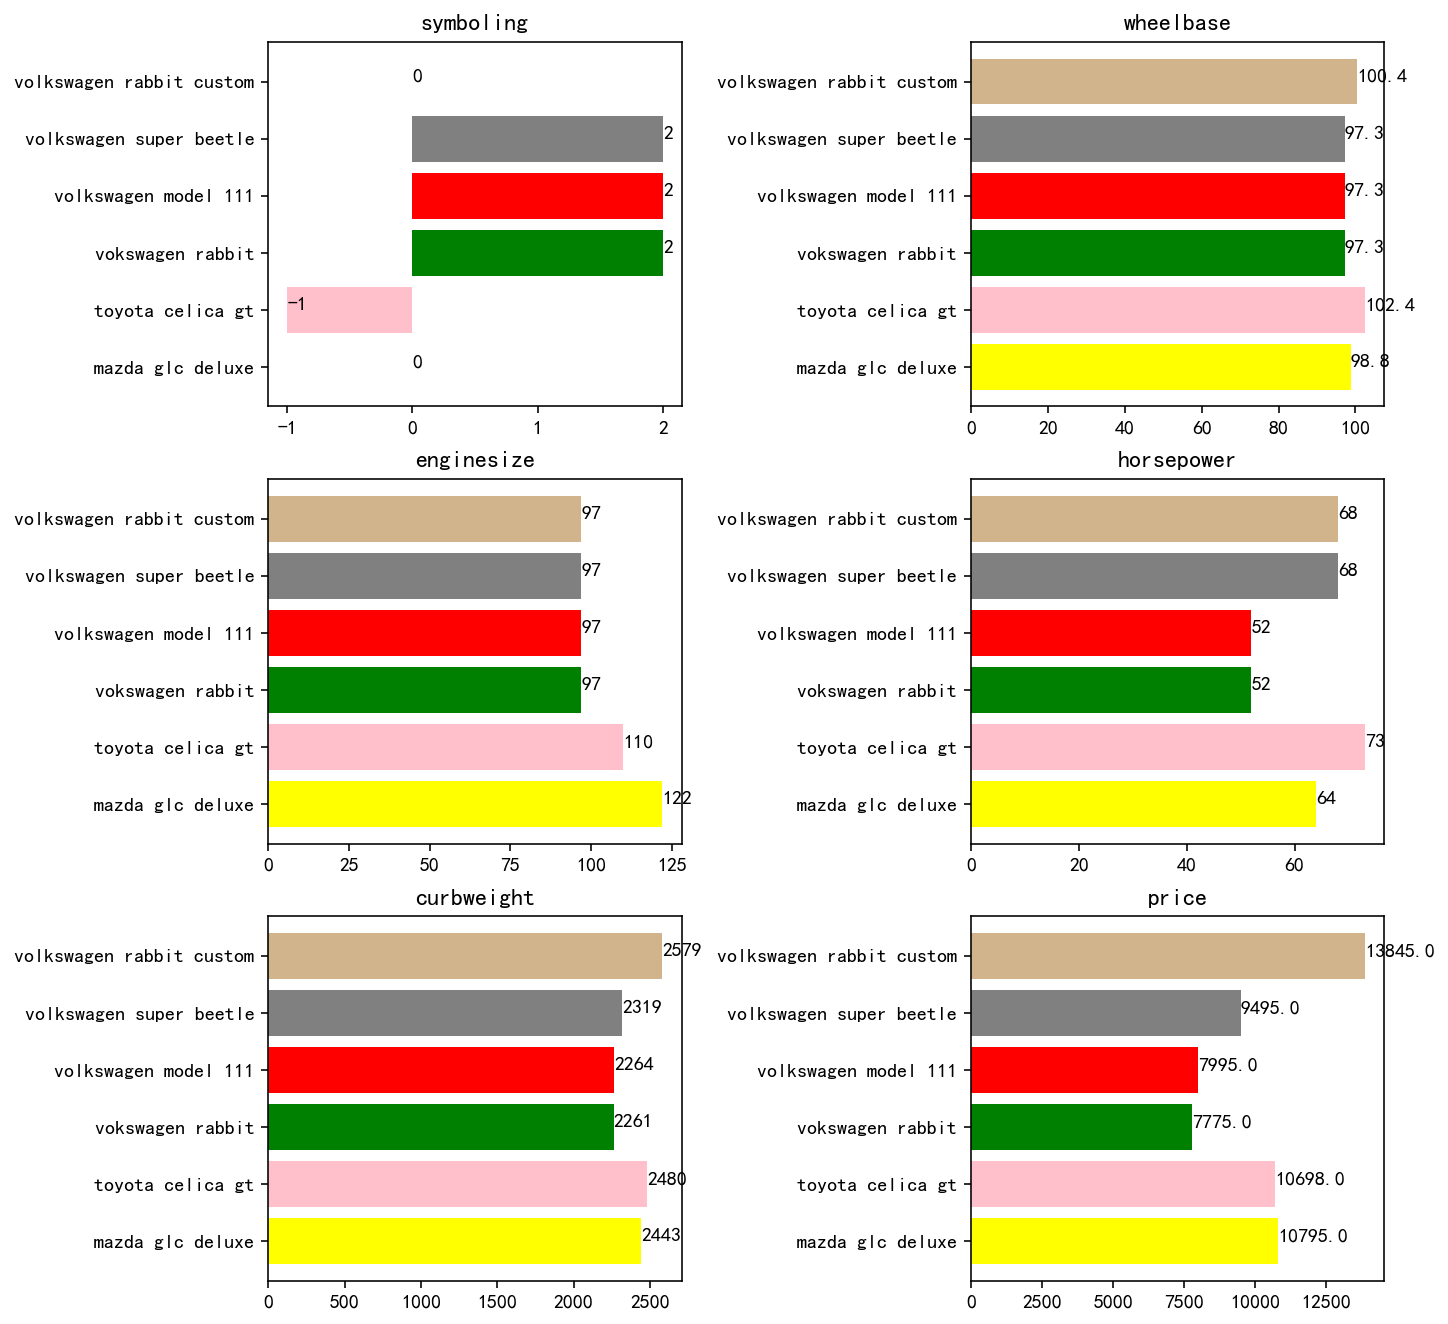

In [53]:
#其他6个特征分析
colors=['yellow', 'pink', 'green','red',  'gray','tan','darkviolet']
col2=['symboling','wheelbase','enginesize','horsepower','curbweight','price']
data=df5_A[col2]

fig=plt.figure(figsize=(10,8))
i=1
for c in data.columns:
    ax=fig.add_subplot(3,2,i)
    plt.barh(range(len(lab)),data[c],tick_label=lab,color=colors)
    for y,x in enumerate(data[c].values):
        plt.text(x,y,"%s" %x)
    i=i+1
    plt.xlabel('')
    plt.title(c)
plt.subplots_adjust(top=1.2,wspace=0.7)
plt.show()